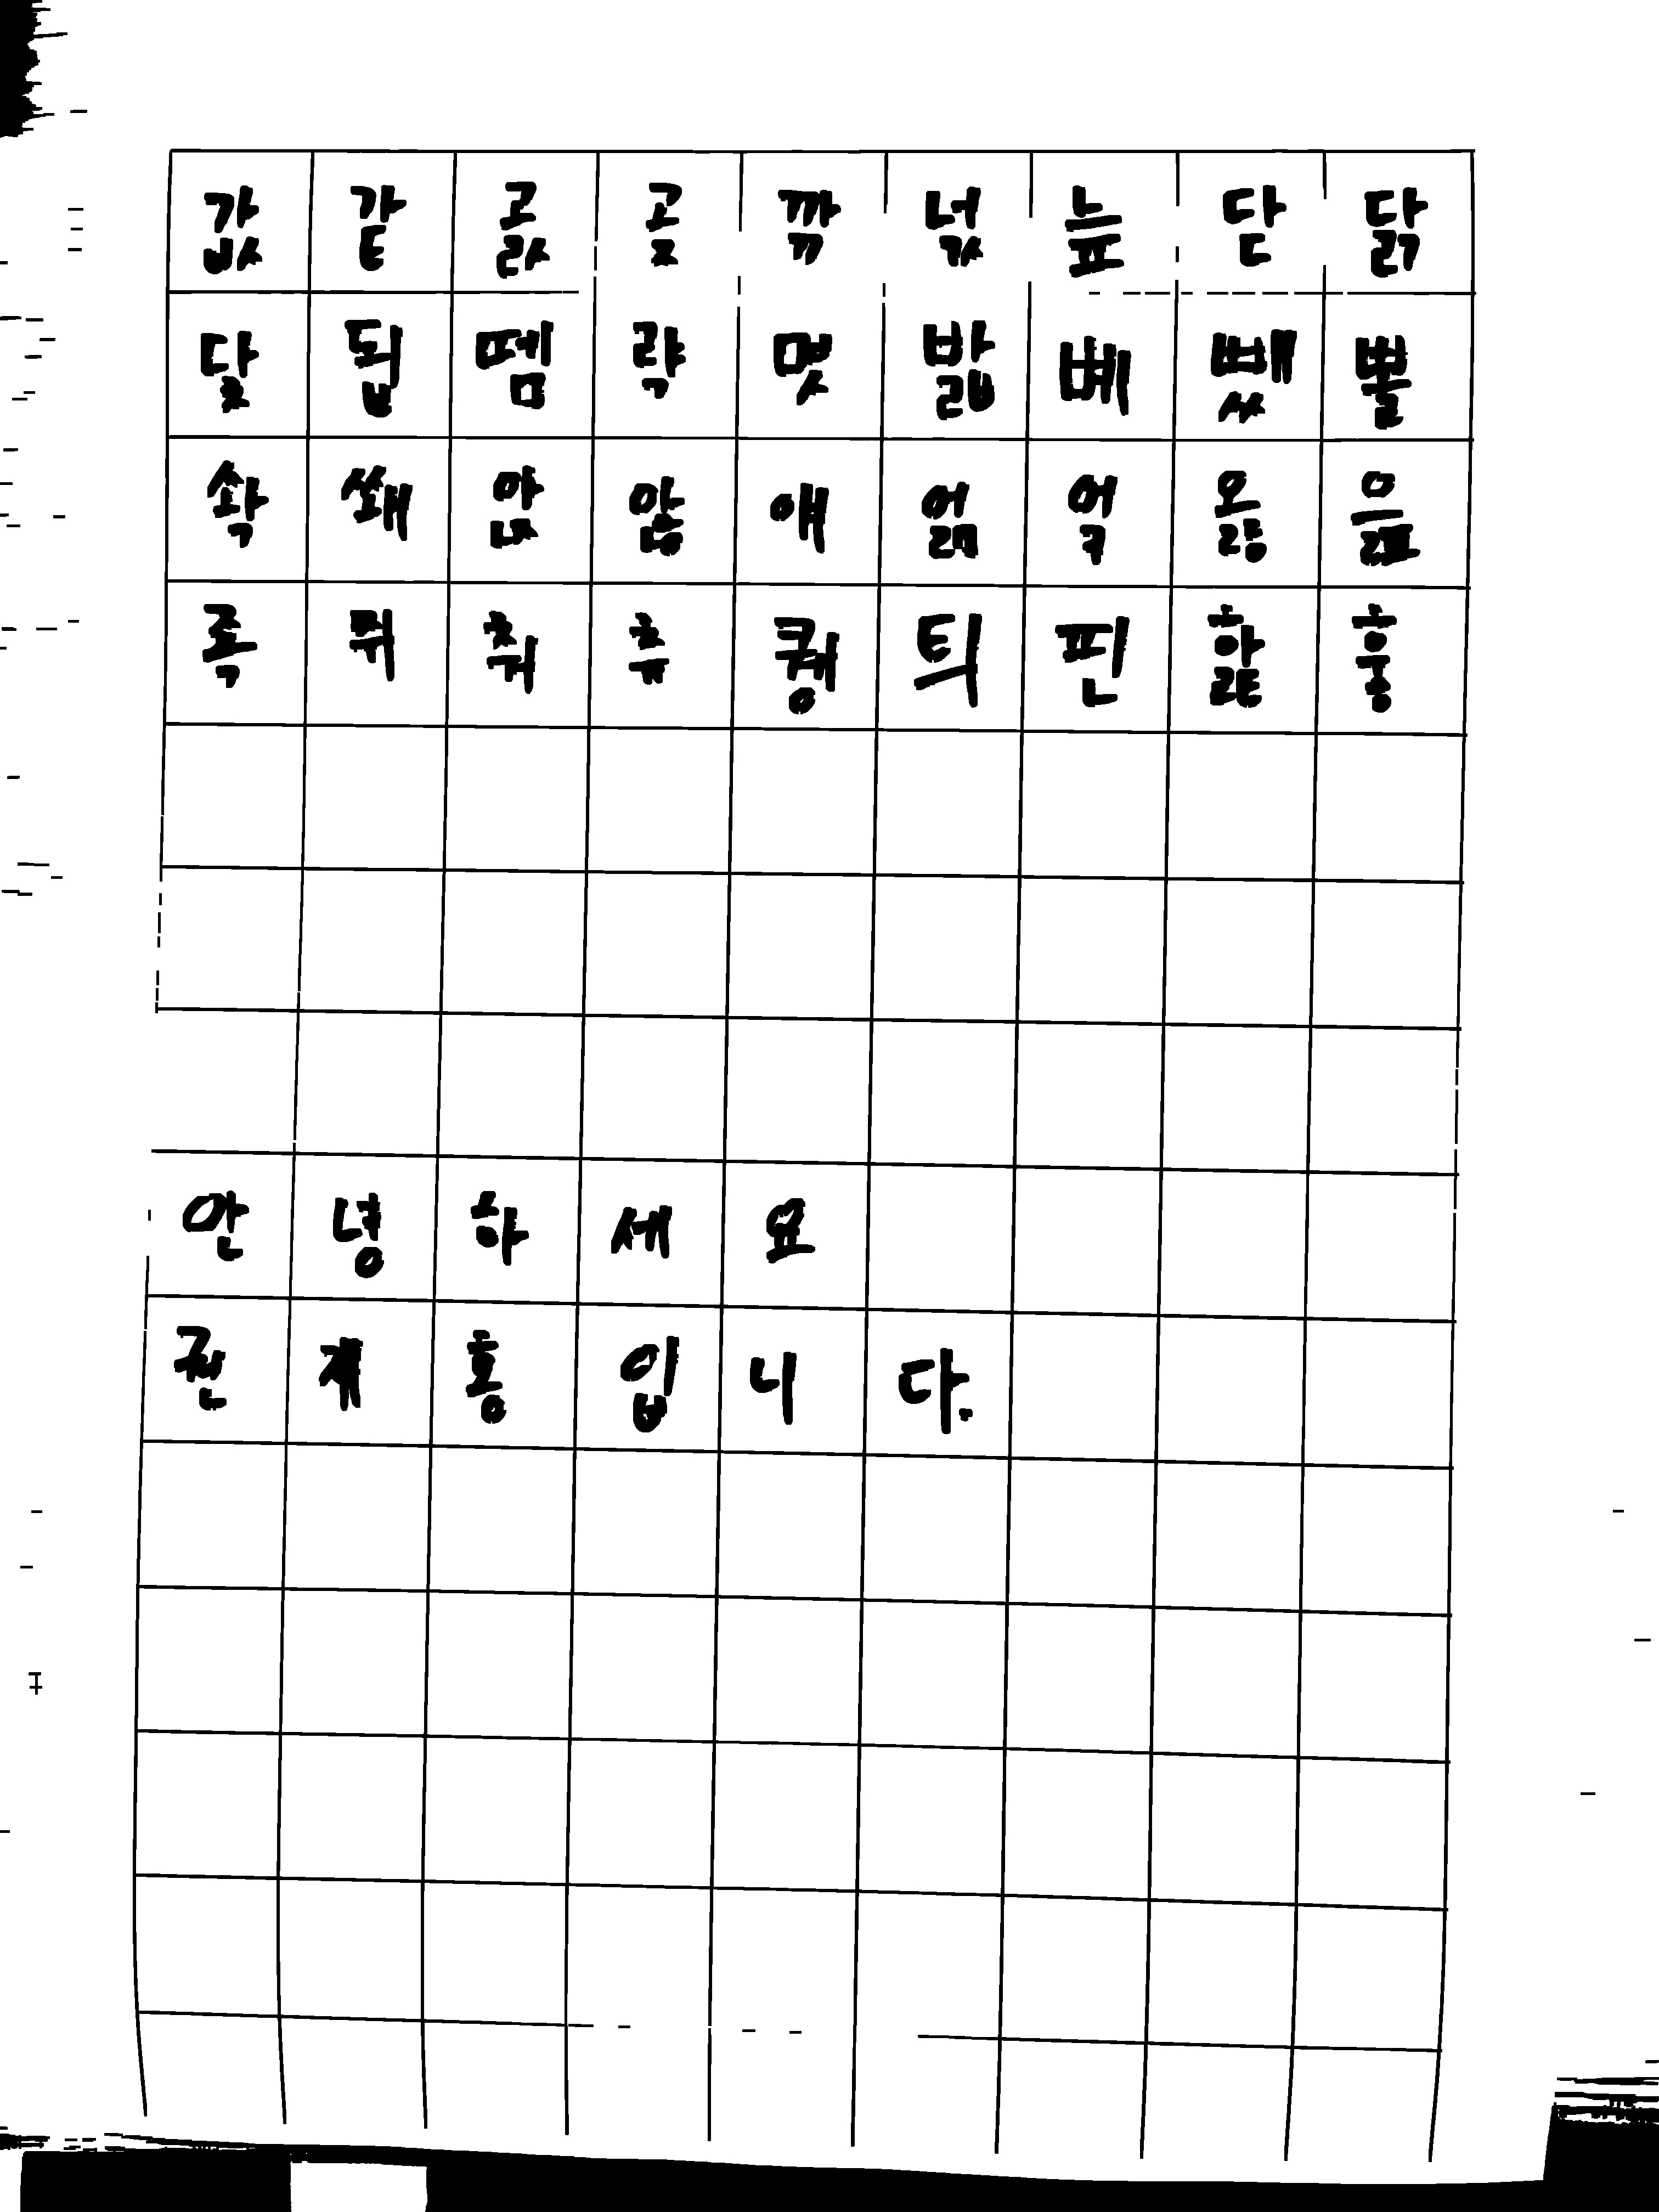

In [11]:
import cv2
import numpy as np
import os
from PIL import Image


def imshow(img):
    import cv2
    import IPython
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)
    
    
img_path = './77d79e6b-3b3b-4893-bfe2-a05bc7b5b974.jpg'


img = cv2.imread(img_path)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
(thresh, img_bin) = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
img_bin = cv2.bitwise_not(img_bin)

kernel_length_v = (np.array(img_gray).shape[1]) // 500 # 120
## 커널사이즈 잡음
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length_v))
## 침식
im_temp1 = cv2.erode(img_bin, vertical_kernel, iterations=3)
## 팽창
vertical_lines_img = cv2.dilate(im_temp1, vertical_kernel, iterations=3)



kernel_length_h = (np.array(img_gray).shape[1]) // 500 # 40
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length_h, 1))
im_temp2 = cv2.erode(img_bin, horizontal_kernel, iterations=3)
horizontal_lines_img = cv2.dilate(im_temp2, horizontal_kernel, iterations=3)


kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
table_segment = cv2.addWeighted(vertical_lines_img, 0.5, horizontal_lines_img, 0.5, 0.0)
table_segment = cv2.erode(cv2.bitwise_not(table_segment), kernel, iterations=2)
thresh, table_segment = cv2.threshold(table_segment, 0, 255, cv2.THRESH_OTSU)

contours, hierarchy = cv2.findContours(table_segment, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# contours = cv2.findContours(table_segment, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
count = 0

imshow(table_segment)

# print('contours :', len(contours))
# for c in reversed(contours):
#     x, y, w, h = cv2.boundingRect(c)
#     if w < 170 and h < 170:
#         count += 1
#         cropped = img[y:y + h, x:x + w]

#         if True:
#             cv2.imwrite(work_dir + "/crop_image/crop_" + str(count) + "__" + img_path.split('/')[-1], cropped)
#     cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)

# if True:
#     cv2.imwrite(work_dir + "/table_detect__" + img_path.split('/')[-1], table_segment)
#     cv2.imwrite(work_dir + "/bb__" + img_path.split('/')[-1], img)


In [12]:
vertical_kernel

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1]], dtype=uint8)